In [19]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: TSM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


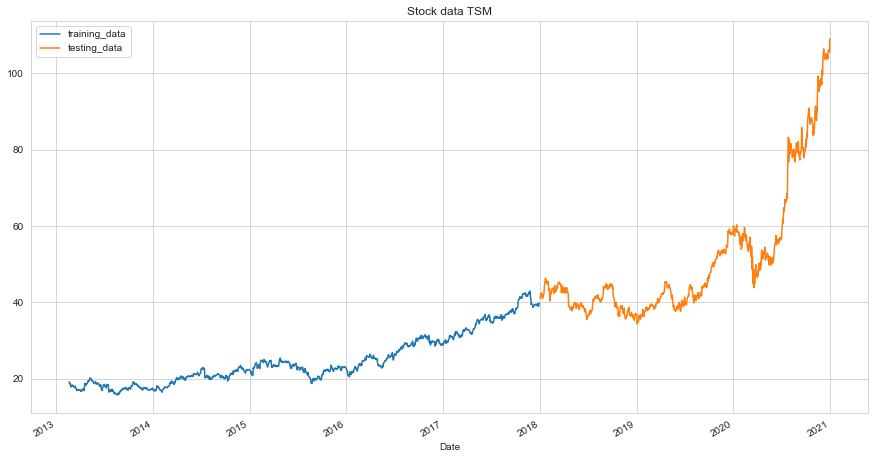

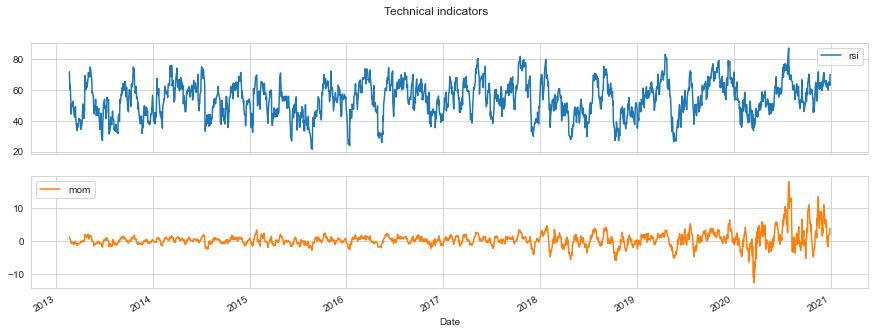

In [20]:
stock_name = 'tsm'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [21]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1386.96, duration: 0:00:00.218069
episode: 2/2000, episode end value: 1370.79, duration: 0:00:00.226034
episode: 3/2000, episode end value: 1397.25, duration: 0:00:00.213057
episode: 4/2000, episode end value: 1358.15, duration: 0:00:00.214063
episode: 5/2000, episode end value: 1386.00, duration: 0:00:00.223034
episode: 6/2000, episode end value: 1382.64, duration: 0:00:00.265067
episode: 7/2000, episode end value: 1375.91, duration: 0:00:00.286054
episode: 8/2000, episode end value: 1387.64, duration: 0:00:00.298060
episode: 9/2000, episode end value: 1419.51, duration: 0:00:00.240053
episode: 10/2000, episode end value: 1382.24, duration: 0:00:00.205031
episode: 11/2000, episode end value: 1377.41, duration: 0:00:00.222218
episode: 12/2000, episode end value: 1379.38, duration: 0:00:00.260137
episode: 13/2000, episode end value: 1381.69, duration: 0:00:00.274752
episode: 14/2000, episode end value: 1379.91, duration: 0:00:00.258263
episode: 15/200

episode: 117/2000, episode end value: 1428.15, duration: 0:00:00.231046
episode: 118/2000, episode end value: 1377.98, duration: 0:00:00.226992
episode: 119/2000, episode end value: 1430.96, duration: 0:00:00.225580
episode: 120/2000, episode end value: 1550.50, duration: 0:00:00.216216
episode: 121/2000, episode end value: 1409.92, duration: 0:00:00.219139
episode: 122/2000, episode end value: 1459.35, duration: 0:00:00.242636
episode: 123/2000, episode end value: 1422.53, duration: 0:00:00.228489
episode: 124/2000, episode end value: 1494.10, duration: 0:00:00.215453
episode: 125/2000, episode end value: 1412.73, duration: 0:00:00.222571
episode: 126/2000, episode end value: 1400.00, duration: 0:00:00.212202
episode: 127/2000, episode end value: 1390.27, duration: 0:00:00.230793
episode: 128/2000, episode end value: 1422.58, duration: 0:00:00.226465
episode: 129/2000, episode end value: 1403.94, duration: 0:00:00.246589
episode: 130/2000, episode end value: 1496.49, duration: 0:00:00

episode: 231/2000, episode end value: 1384.85, duration: 0:00:00.263312
episode: 232/2000, episode end value: 1382.07, duration: 0:00:00.276565
episode: 233/2000, episode end value: 1406.19, duration: 0:00:00.249755
episode: 234/2000, episode end value: 1494.04, duration: 0:00:00.204060
episode: 235/2000, episode end value: 1470.33, duration: 0:00:00.245052
episode: 236/2000, episode end value: 1453.76, duration: 0:00:00.224306
episode: 237/2000, episode end value: 1396.79, duration: 0:00:00.271438
episode: 238/2000, episode end value: 1394.70, duration: 0:00:00.247514
episode: 239/2000, episode end value: 1418.73, duration: 0:00:00.237140
episode: 240/2000, episode end value: 1398.51, duration: 0:00:00.269673
episode: 241/2000, episode end value: 1421.48, duration: 0:00:00.245185
episode: 242/2000, episode end value: 1409.39, duration: 0:00:00.277502
episode: 243/2000, episode end value: 1472.80, duration: 0:00:00.199837
episode: 244/2000, episode end value: 1394.72, duration: 0:00:00

episode: 345/2000, episode end value: 1367.08, duration: 0:00:00.202221
episode: 346/2000, episode end value: 1383.43, duration: 0:00:00.214451
episode: 347/2000, episode end value: 1409.62, duration: 0:00:00.261497
episode: 348/2000, episode end value: 1530.57, duration: 0:00:00.200548
episode: 349/2000, episode end value: 1472.49, duration: 0:00:00.189176
episode: 350/2000, episode end value: 1386.06, duration: 0:00:00.254452
episode: 351/2000, episode end value: 1418.55, duration: 0:00:00.215084
episode: 352/2000, episode end value: 1453.18, duration: 0:00:00.262517
episode: 353/2000, episode end value: 1383.37, duration: 0:00:00.236984
episode: 354/2000, episode end value: 1506.30, duration: 0:00:00.223480
episode: 355/2000, episode end value: 1436.43, duration: 0:00:00.225440
episode: 356/2000, episode end value: 1375.46, duration: 0:00:00.277286
episode: 357/2000, episode end value: 1399.76, duration: 0:00:00.279074
episode: 358/2000, episode end value: 1463.71, duration: 0:00:00

episode: 459/2000, episode end value: 1384.49, duration: 0:00:00.274304
episode: 460/2000, episode end value: 1554.84, duration: 0:00:00.225645
episode: 461/2000, episode end value: 1399.57, duration: 0:00:00.238066
episode: 462/2000, episode end value: 1403.44, duration: 0:00:00.267062
episode: 463/2000, episode end value: 1400.62, duration: 0:00:00.262042
episode: 464/2000, episode end value: 1398.50, duration: 0:00:00.256054
episode: 465/2000, episode end value: 1390.99, duration: 0:00:00.248041
episode: 466/2000, episode end value: 1441.46, duration: 0:00:00.214063
episode: 467/2000, episode end value: 1430.75, duration: 0:00:00.213055
episode: 468/2000, episode end value: 1390.74, duration: 0:00:00.214032
episode: 469/2000, episode end value: 1390.24, duration: 0:00:00.239063
episode: 470/2000, episode end value: 1386.77, duration: 0:00:00.240062
episode: 471/2000, episode end value: 1392.84, duration: 0:00:00.268052
episode: 472/2000, episode end value: 1547.85, duration: 0:00:00

episode: 573/2000, episode end value: 1514.36, duration: 0:00:00.229153
episode: 574/2000, episode end value: 1382.72, duration: 0:00:00.248118
episode: 575/2000, episode end value: 1494.22, duration: 0:00:00.265901
episode: 576/2000, episode end value: 1380.96, duration: 0:00:00.241482
episode: 577/2000, episode end value: 1440.18, duration: 0:00:00.222600
episode: 578/2000, episode end value: 1382.48, duration: 0:00:00.226136
episode: 579/2000, episode end value: 1463.62, duration: 0:00:00.249097
episode: 580/2000, episode end value: 1419.18, duration: 0:00:00.265992
episode: 581/2000, episode end value: 1386.66, duration: 0:00:00.227394
episode: 582/2000, episode end value: 1461.50, duration: 0:00:00.252546
episode: 583/2000, episode end value: 1438.01, duration: 0:00:00.226477
episode: 584/2000, episode end value: 1389.99, duration: 0:00:00.236134
episode: 585/2000, episode end value: 1385.12, duration: 0:00:00.252413
episode: 586/2000, episode end value: 1408.62, duration: 0:00:00

episode: 687/2000, episode end value: 1402.42, duration: 0:00:00.280753
episode: 688/2000, episode end value: 1382.59, duration: 0:00:00.214983
episode: 689/2000, episode end value: 1398.63, duration: 0:00:00.296941
episode: 690/2000, episode end value: 1428.16, duration: 0:00:00.276559
episode: 691/2000, episode end value: 1406.78, duration: 0:00:00.278508
episode: 692/2000, episode end value: 1377.27, duration: 0:00:00.247869
episode: 693/2000, episode end value: 1497.52, duration: 0:00:00.234321
episode: 694/2000, episode end value: 1394.56, duration: 0:00:00.240141
episode: 695/2000, episode end value: 1398.20, duration: 0:00:00.253208
episode: 696/2000, episode end value: 1528.85, duration: 0:00:00.236924
episode: 697/2000, episode end value: 1413.77, duration: 0:00:00.241353
episode: 698/2000, episode end value: 1417.32, duration: 0:00:00.250291
episode: 699/2000, episode end value: 1458.78, duration: 0:00:00.268434
episode: 700/2000, episode end value: 1446.90, duration: 0:00:00

episode: 801/2000, episode end value: 1396.70, duration: 0:00:00.221022
episode: 802/2000, episode end value: 1523.04, duration: 0:00:00.218771
episode: 803/2000, episode end value: 1423.38, duration: 0:00:00.250593
episode: 804/2000, episode end value: 1497.51, duration: 0:00:00.199700
episode: 805/2000, episode end value: 1406.47, duration: 0:00:00.240565
episode: 806/2000, episode end value: 1387.29, duration: 0:00:00.221487
episode: 807/2000, episode end value: 1378.58, duration: 0:00:00.228815
episode: 808/2000, episode end value: 1426.15, duration: 0:00:00.199202
episode: 809/2000, episode end value: 1398.92, duration: 0:00:00.250786
episode: 810/2000, episode end value: 1410.19, duration: 0:00:00.233482
episode: 811/2000, episode end value: 1429.75, duration: 0:00:00.209552
episode: 812/2000, episode end value: 1398.46, duration: 0:00:00.203333
episode: 813/2000, episode end value: 1496.62, duration: 0:00:00.241671
episode: 814/2000, episode end value: 1410.62, duration: 0:00:00

episode: 915/2000, episode end value: 1415.66, duration: 0:00:00.239040
episode: 916/2000, episode end value: 1481.92, duration: 0:00:00.232700
episode: 917/2000, episode end value: 1438.43, duration: 0:00:00.192896
episode: 918/2000, episode end value: 1400.83, duration: 0:00:00.179009
episode: 919/2000, episode end value: 1425.40, duration: 0:00:00.236417
episode: 920/2000, episode end value: 1407.78, duration: 0:00:00.197248
episode: 921/2000, episode end value: 1396.58, duration: 0:00:00.188406
episode: 922/2000, episode end value: 1394.56, duration: 0:00:00.219812
episode: 923/2000, episode end value: 1419.71, duration: 0:00:00.313170
episode: 924/2000, episode end value: 1380.39, duration: 0:00:00.254101
episode: 925/2000, episode end value: 1386.14, duration: 0:00:00.255510
episode: 926/2000, episode end value: 1482.56, duration: 0:00:00.213045
episode: 927/2000, episode end value: 1469.30, duration: 0:00:00.232050
episode: 928/2000, episode end value: 1399.73, duration: 0:00:00

episode: 1030/2000, episode end value: 1498.12, duration: 0:00:00.233595
episode: 1031/2000, episode end value: 1455.35, duration: 0:00:00.205962
episode: 1032/2000, episode end value: 1424.59, duration: 0:00:00.218085
episode: 1033/2000, episode end value: 1378.94, duration: 0:00:00.217084
episode: 1034/2000, episode end value: 1552.65, duration: 0:00:00.210143
episode: 1035/2000, episode end value: 1394.33, duration: 0:00:00.206582
episode: 1036/2000, episode end value: 1422.96, duration: 0:00:00.240286
episode: 1037/2000, episode end value: 1401.69, duration: 0:00:00.227482
episode: 1038/2000, episode end value: 1389.90, duration: 0:00:00.215419
episode: 1039/2000, episode end value: 1531.56, duration: 0:00:00.191480
episode: 1040/2000, episode end value: 1404.43, duration: 0:00:00.228224
episode: 1041/2000, episode end value: 1411.49, duration: 0:00:00.199293
episode: 1042/2000, episode end value: 1459.82, duration: 0:00:00.237657
episode: 1043/2000, episode end value: 1435.72, dur

episode: 1143/2000, episode end value: 1412.15, duration: 0:00:00.250147
episode: 1144/2000, episode end value: 1407.36, duration: 0:00:00.233937
episode: 1145/2000, episode end value: 1407.15, duration: 0:00:00.244810
episode: 1146/2000, episode end value: 1462.70, duration: 0:00:00.246748
episode: 1147/2000, episode end value: 1388.26, duration: 0:00:00.249112
episode: 1148/2000, episode end value: 1448.19, duration: 0:00:00.246073
episode: 1149/2000, episode end value: 1555.39, duration: 0:00:00.209160
episode: 1150/2000, episode end value: 1379.74, duration: 0:00:00.232437
episode: 1151/2000, episode end value: 1442.83, duration: 0:00:00.210987
episode: 1152/2000, episode end value: 1411.12, duration: 0:00:00.233052
episode: 1153/2000, episode end value: 1401.31, duration: 0:00:00.250692
episode: 1154/2000, episode end value: 1417.31, duration: 0:00:00.253058
episode: 1155/2000, episode end value: 1425.06, duration: 0:00:00.206326
episode: 1156/2000, episode end value: 1396.92, dur

episode: 1256/2000, episode end value: 1606.21, duration: 0:00:00.211065
episode: 1257/2000, episode end value: 1453.37, duration: 0:00:00.219032
episode: 1258/2000, episode end value: 1403.71, duration: 0:00:00.225066
episode: 1259/2000, episode end value: 1380.84, duration: 0:00:00.217056
episode: 1260/2000, episode end value: 1410.72, duration: 0:00:00.221045
episode: 1261/2000, episode end value: 1421.57, duration: 0:00:00.234036
episode: 1262/2000, episode end value: 1463.13, duration: 0:00:00.195044
episode: 1263/2000, episode end value: 1382.26, duration: 0:00:00.245070
episode: 1264/2000, episode end value: 1459.78, duration: 0:00:00.256048
episode: 1265/2000, episode end value: 1479.01, duration: 0:00:00.288065
episode: 1266/2000, episode end value: 1437.67, duration: 0:00:00.191053
episode: 1267/2000, episode end value: 1399.65, duration: 0:00:00.231037
episode: 1268/2000, episode end value: 1429.03, duration: 0:00:00.281065
episode: 1269/2000, episode end value: 1452.97, dur

episode: 1369/2000, episode end value: 1378.49, duration: 0:00:00.216033
episode: 1370/2000, episode end value: 1457.48, duration: 0:00:00.238055
episode: 1371/2000, episode end value: 1415.97, duration: 0:00:00.221055
episode: 1372/2000, episode end value: 1420.20, duration: 0:00:00.243038
episode: 1373/2000, episode end value: 1382.41, duration: 0:00:00.236054
episode: 1374/2000, episode end value: 1394.64, duration: 0:00:00.265048
episode: 1375/2000, episode end value: 1503.12, duration: 0:00:00.185047
episode: 1376/2000, episode end value: 1393.69, duration: 0:00:00.220049
episode: 1377/2000, episode end value: 1407.83, duration: 0:00:00.198048
episode: 1378/2000, episode end value: 1408.86, duration: 0:00:00.231053
episode: 1379/2000, episode end value: 1397.51, duration: 0:00:00.202041
episode: 1380/2000, episode end value: 1456.46, duration: 0:00:00.233051
episode: 1381/2000, episode end value: 1392.58, duration: 0:00:00.247062
episode: 1382/2000, episode end value: 1387.79, dur

episode: 1482/2000, episode end value: 1420.03, duration: 0:00:00.216032
episode: 1483/2000, episode end value: 1464.31, duration: 0:00:00.215060
episode: 1484/2000, episode end value: 1495.66, duration: 0:00:00.227036
episode: 1485/2000, episode end value: 1402.89, duration: 0:00:00.231054
episode: 1486/2000, episode end value: 1452.15, duration: 0:00:00.200058
episode: 1487/2000, episode end value: 1440.40, duration: 0:00:00.229035
episode: 1488/2000, episode end value: 1394.46, duration: 0:00:00.232050
episode: 1489/2000, episode end value: 1404.21, duration: 0:00:00.237056
episode: 1490/2000, episode end value: 1498.61, duration: 0:00:00.202045
episode: 1491/2000, episode end value: 1398.31, duration: 0:00:00.218063
episode: 1492/2000, episode end value: 1426.52, duration: 0:00:00.234052
episode: 1493/2000, episode end value: 1396.84, duration: 0:00:00.210047
episode: 1494/2000, episode end value: 1447.70, duration: 0:00:00.227063
episode: 1495/2000, episode end value: 1434.52, dur

episode: 1595/2000, episode end value: 1448.33, duration: 0:00:00.285060
episode: 1596/2000, episode end value: 1394.03, duration: 0:00:00.236071
episode: 1597/2000, episode end value: 1386.45, duration: 0:00:00.243070
episode: 1598/2000, episode end value: 1364.30, duration: 0:00:00.219035
episode: 1599/2000, episode end value: 1480.13, duration: 0:00:00.210044
episode: 1600/2000, episode end value: 1404.90, duration: 0:00:00.220053
episode: 1601/2000, episode end value: 1404.58, duration: 0:00:00.233066
episode: 1602/2000, episode end value: 1490.41, duration: 0:00:00.203046
episode: 1603/2000, episode end value: 1377.06, duration: 0:00:00.185041
episode: 1604/2000, episode end value: 1447.04, duration: 0:00:00.177026
episode: 1605/2000, episode end value: 1343.56, duration: 0:00:00.192060
episode: 1606/2000, episode end value: 1414.20, duration: 0:00:00.225049
episode: 1607/2000, episode end value: 1398.53, duration: 0:00:00.215050
episode: 1608/2000, episode end value: 1390.31, dur

episode: 1708/2000, episode end value: 1387.07, duration: 0:00:00.221050
episode: 1709/2000, episode end value: 1384.23, duration: 0:00:00.304066
episode: 1710/2000, episode end value: 1396.46, duration: 0:00:00.253061
episode: 1711/2000, episode end value: 1392.49, duration: 0:00:00.238037
episode: 1712/2000, episode end value: 1447.77, duration: 0:00:00.227052
episode: 1713/2000, episode end value: 1402.93, duration: 0:00:00.239052
episode: 1714/2000, episode end value: 1398.78, duration: 0:00:00.247054
episode: 1715/2000, episode end value: 1421.34, duration: 0:00:00.213048
episode: 1716/2000, episode end value: 1410.35, duration: 0:00:00.229065
episode: 1717/2000, episode end value: 1406.91, duration: 0:00:00.218051
episode: 1718/2000, episode end value: 1385.47, duration: 0:00:00.210045
episode: 1719/2000, episode end value: 1416.72, duration: 0:00:00.215046
episode: 1720/2000, episode end value: 1392.60, duration: 0:00:00.223044
episode: 1721/2000, episode end value: 1385.44, dur

episode: 1821/2000, episode end value: 1533.61, duration: 0:00:00.224057
episode: 1822/2000, episode end value: 1455.03, duration: 0:00:00.229036
episode: 1823/2000, episode end value: 1444.31, duration: 0:00:00.230067
episode: 1824/2000, episode end value: 1383.89, duration: 0:00:00.215034
episode: 1825/2000, episode end value: 1413.82, duration: 0:00:00.213056
episode: 1826/2000, episode end value: 1401.49, duration: 0:00:00.224034
episode: 1827/2000, episode end value: 1414.79, duration: 0:00:00.191043
episode: 1828/2000, episode end value: 1499.66, duration: 0:00:00.178038
episode: 1829/2000, episode end value: 1411.96, duration: 0:00:00.199046
episode: 1830/2000, episode end value: 1434.47, duration: 0:00:00.223066
episode: 1831/2000, episode end value: 1395.36, duration: 0:00:00.210047
episode: 1832/2000, episode end value: 1426.04, duration: 0:00:00.234054
episode: 1833/2000, episode end value: 1401.36, duration: 0:00:00.228049
episode: 1834/2000, episode end value: 1410.18, dur

episode: 1934/2000, episode end value: 1388.11, duration: 0:00:00.238052
episode: 1935/2000, episode end value: 1435.94, duration: 0:00:00.210051
episode: 1936/2000, episode end value: 1395.69, duration: 0:00:00.221057
episode: 1937/2000, episode end value: 1459.15, duration: 0:00:00.207046
episode: 1938/2000, episode end value: 1429.92, duration: 0:00:00.236059
episode: 1939/2000, episode end value: 1445.25, duration: 0:00:00.196031
episode: 1940/2000, episode end value: 1470.45, duration: 0:00:00.225058
episode: 1941/2000, episode end value: 1404.56, duration: 0:00:00.192043
episode: 1942/2000, episode end value: 1410.40, duration: 0:00:00.213054
episode: 1943/2000, episode end value: 1432.03, duration: 0:00:00.178040
episode: 1944/2000, episode end value: 1357.28, duration: 0:00:00.197038
episode: 1945/2000, episode end value: 1386.68, duration: 0:00:00.214048
episode: 1946/2000, episode end value: 1400.38, duration: 0:00:00.229052
episode: 1947/2000, episode end value: 1419.56, dur

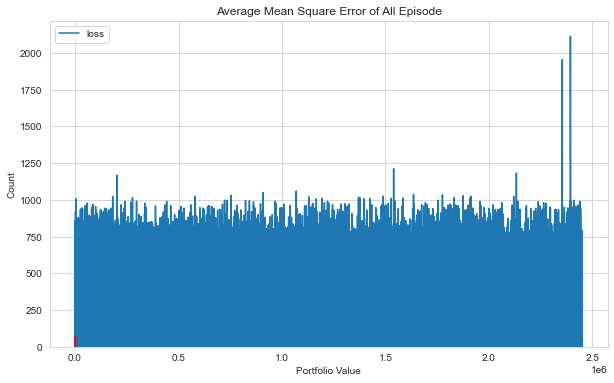

In [22]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

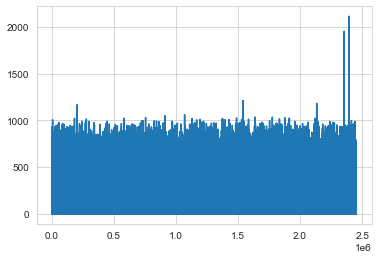

In [23]:
plt.plot(agent.model.losses)

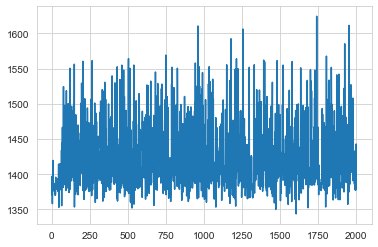

In [24]:
plt.plot(portfolio_value)

episode end value: 1898.82, duration: 0:00:00.049018
Sell: 0 times, Buy: 1 times


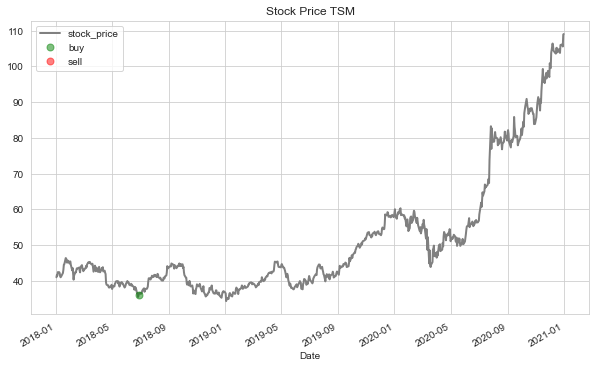

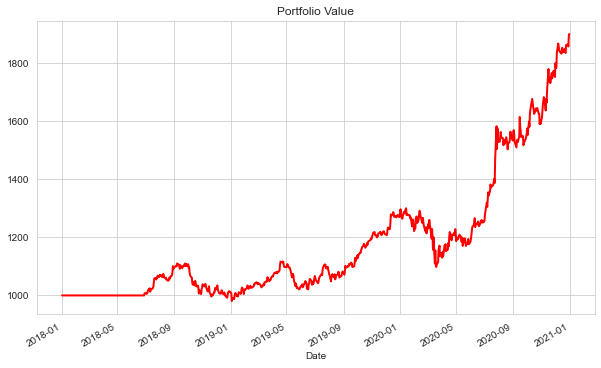

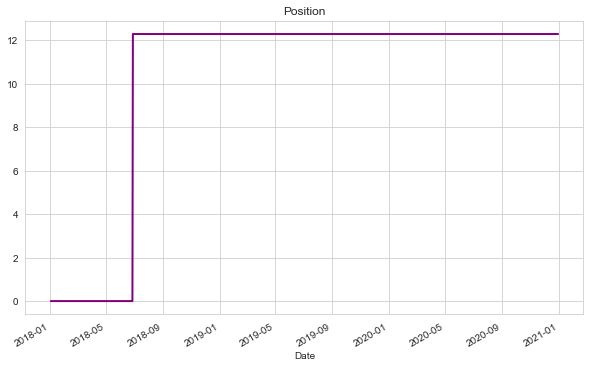

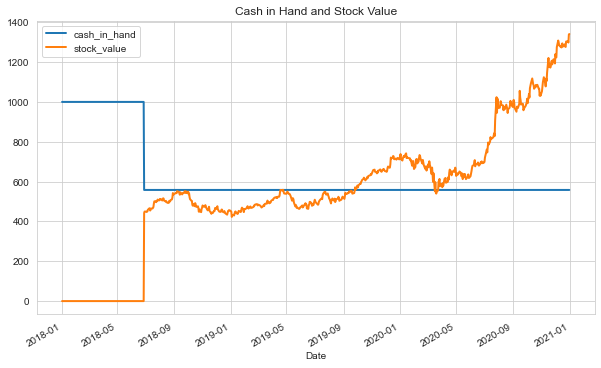

In [25]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [26]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TSM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 23.83 %
Volatility: 0.1751
shape ratio: 1.2979
Maximun drawdown: -15.54 %
Calmar ratio: 1.5331
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 38.53 %
Volatility (benchmark): 0.3391
shape ratio: 1.1038
Maximun drawdown: -27.24 %
Calmar ratio (benchmark): 1.4144


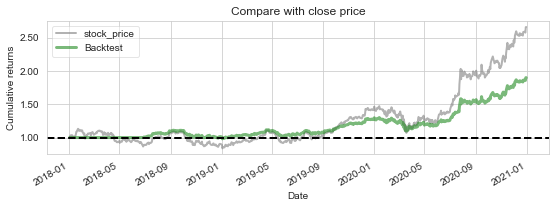

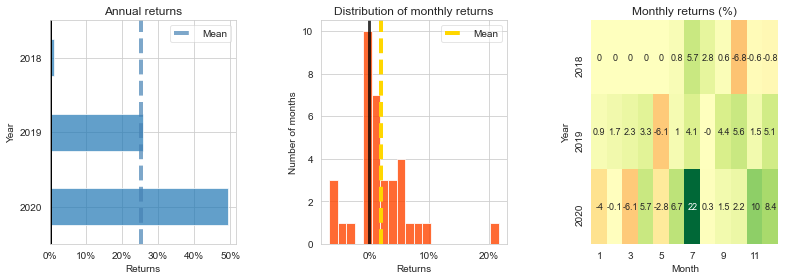

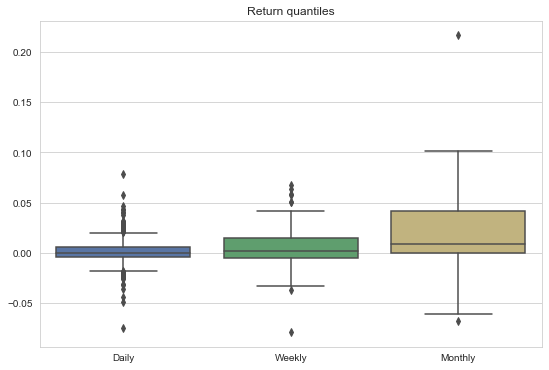

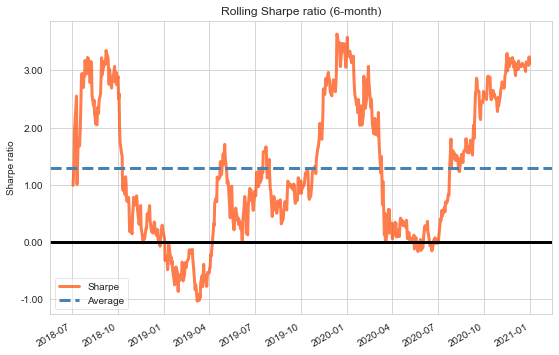

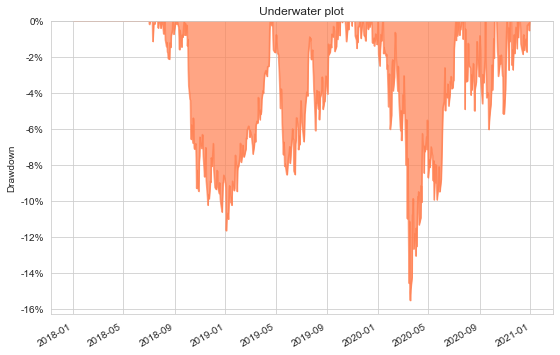

In [27]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')